In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("Figures/Fig2.19(a).jpg",-1)

## Vecino más cercano

In [2]:
def scale_nn(original, height, width):
    
    # Matriz de ceros.
    zoom = np.zeros((height, width)).astype('float32')
    # Razón de reesclado.
    y = height/len(original[:,0])
    x = width/len(original[0,:])
    
    # Recorrer nueva matriz.
    for row in range(height):
        # Límite de filas para los 4 vecinos.
        if row < height - y:
            y0 = int(row/y)
        for col in range(width):
            # Límite de columnas para los 4 vecinos.
            if col < width - x:
                x0 = int(col/x)
                # 4 vecinos de referencia
                px0 = original[y0, x0]
                px1 = original[y0, x0+1]
                px2 = original[y0+1, x0]
                px3 = original[y0+1, x0+1]
                # Lista de vecinos para tener un índice.
                px = list((px0, px1, px2, px3))
            # Cálculo de distancias.
            d0 = ((x0 + 0.5*x - col - 0.5)**2 + (y0 + 0.5*y - row - 0.5)**2)**0.5
            d1 = ((x0 + 1.5*x - col - 0.5)**2 + (y0 + 0.5*y - row - 0.5)**2)**0.5
            d2 = ((x0 + 0.5*x - col - 0.5)**2 + (y0 + 1.5*y - row - 0.5)**2)**0.5
            d3 = ((x0 + 1.5*x - col - 0.5)**2 + (y0 + 1.5*y - row - 0.5)**2)**0.5
            # Distancias guardadas en lista para obtener un índice que coincida con la lista de píxeles.
            d = list((d0, d1, d2, d3))
            # Asigna el valor del píxel con menor distancia.
            zoom[row, col] = px[d.index(min(d))]
    
    # Comparación.
    plt.figure(1, figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.axis('off')
    plt.imshow(original, cmap = 'gray')
    plt.subplot(1, 2, 2)
    plt.title('Scaled')
    plt.axis('off')
    plt.imshow(zoom, cmap = 'gray')
    
    return zoom

#### Ejemplo de llamada

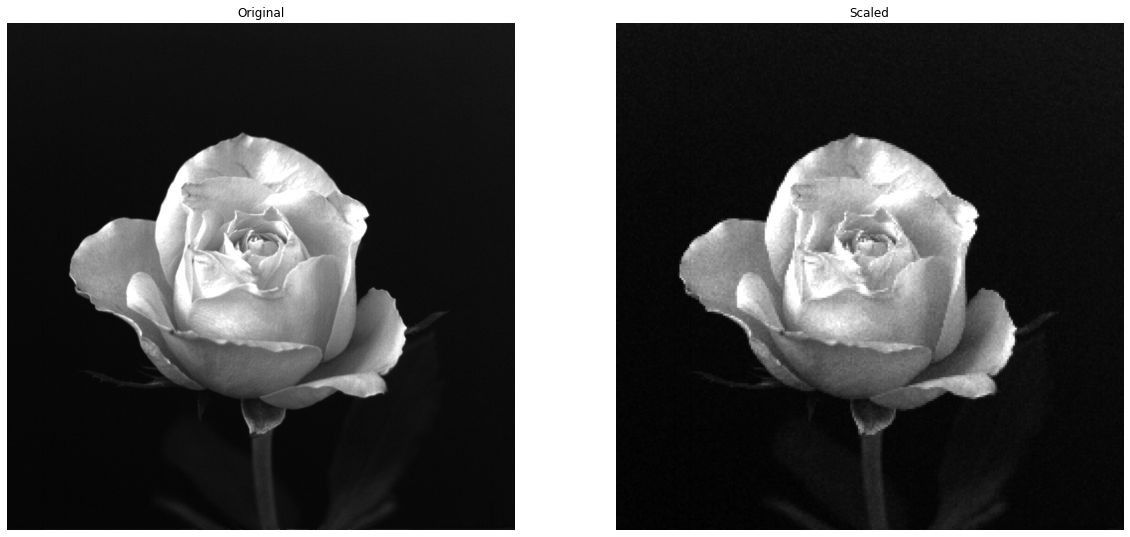

In [3]:
plt.figure(1, figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.title('Nearest neighbor')
plt.axis('off')
plt.imshow(scale_nn(img, 256, 256), cmap = 'gray')

### Resultados

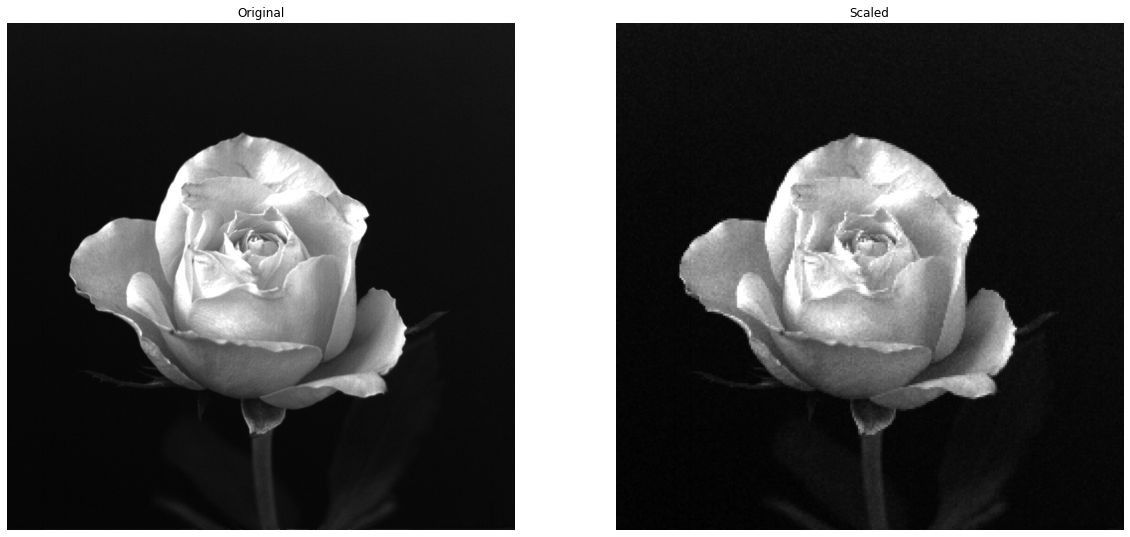

In [4]:
shrink1 = scale_nn(img, 256, 256)

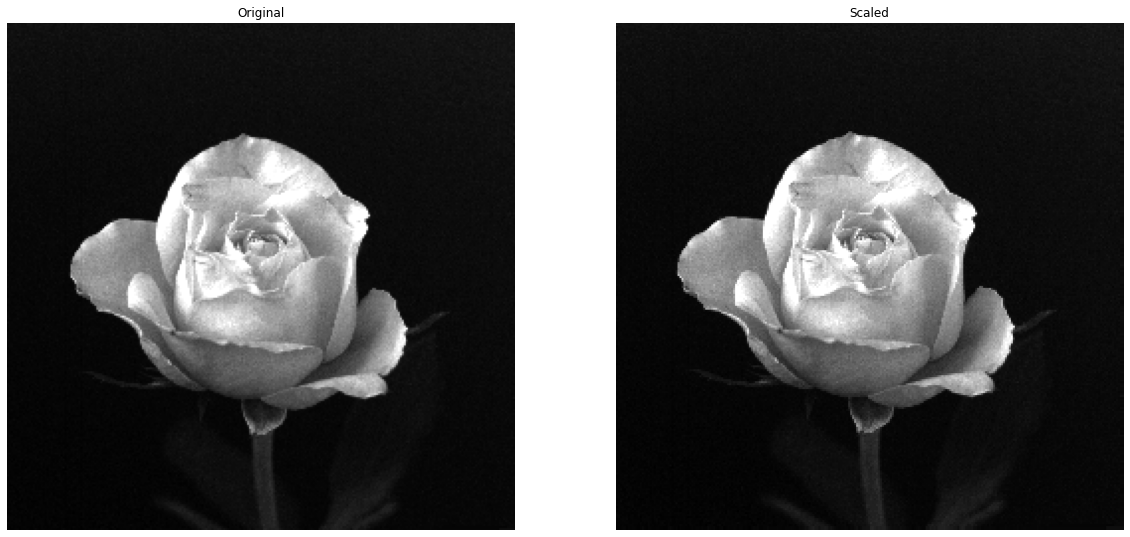

In [5]:
zoom1 = scale_nn(shrink1, 1024, 1024)

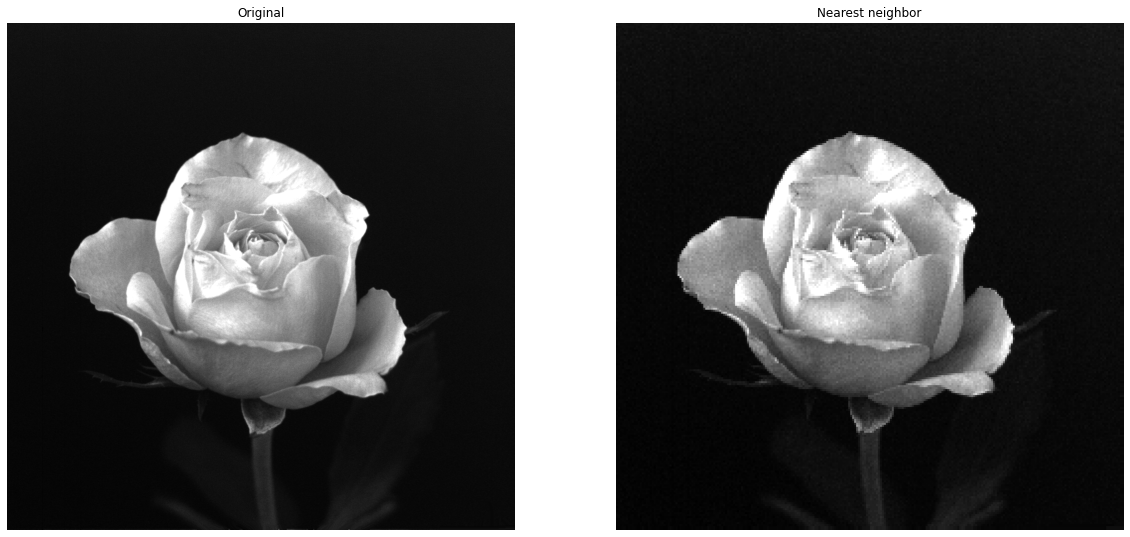

In [6]:
plt.figure(1, figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.title('Nearest neighbor')
plt.axis('off')
plt.imshow(zoom1, cmap = 'gray')

## Interpolación bilineal

In [7]:
def scale_bl(original, height, width):
    
    #height x width, alto x ancho, y x x.
    zoom = np.zeros((height, width)).astype('float32')
    y = height/len(original[:,0])
    x = width/len(original[0,:])
    
    # Recorrer nueva matriz.
    for row in range(height):
        # Límite de filas para los 4 vecinos.
        if row < height - y:
            y0 = int(row/y)
        for col in range(width):
            # Límite de columnas para los 4 vecinos.
            if col < width - x:
                x0 = int(col/x)
                # 4 vecinos de referencia
                px0 = original[y0, x0]
                px1 = original[y0, x0+1]
                px2 = original[y0+1, x0]
                px3 = original[y0+1, x0+1]
            c = col/x - x0
            r = row/y - y0
            z = px0*(1-c)*(1-r) + px1*c*(1-r) + px2*(1-c)*r + px3*c*r
            zoom[row, col] = z

    plt.figure(1, figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.axis('off')
    plt.imshow(original, cmap = 'gray')
    plt.subplot(1, 2, 2)
    plt.title('Scaled')
    plt.axis('off')
    plt.imshow(zoom, cmap = 'gray')
    
    return zoom

#### Ejemplo de llamada

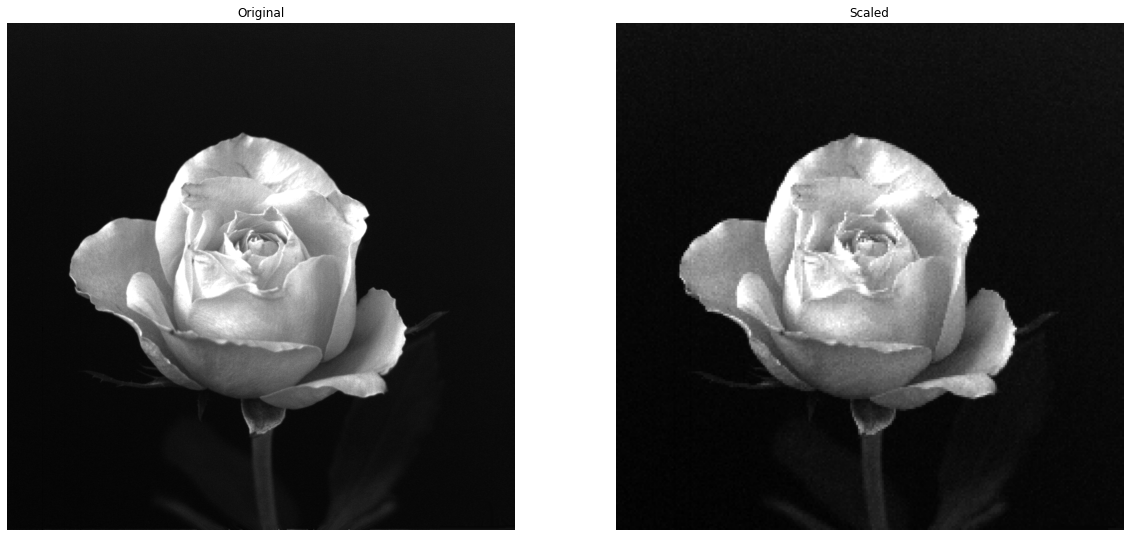

In [8]:
plt.figure(1, figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.title('Bilinear interpolation')
plt.axis('off')
plt.imshow(scale_bl(img, 256, 256), cmap = 'gray')

### Resultados

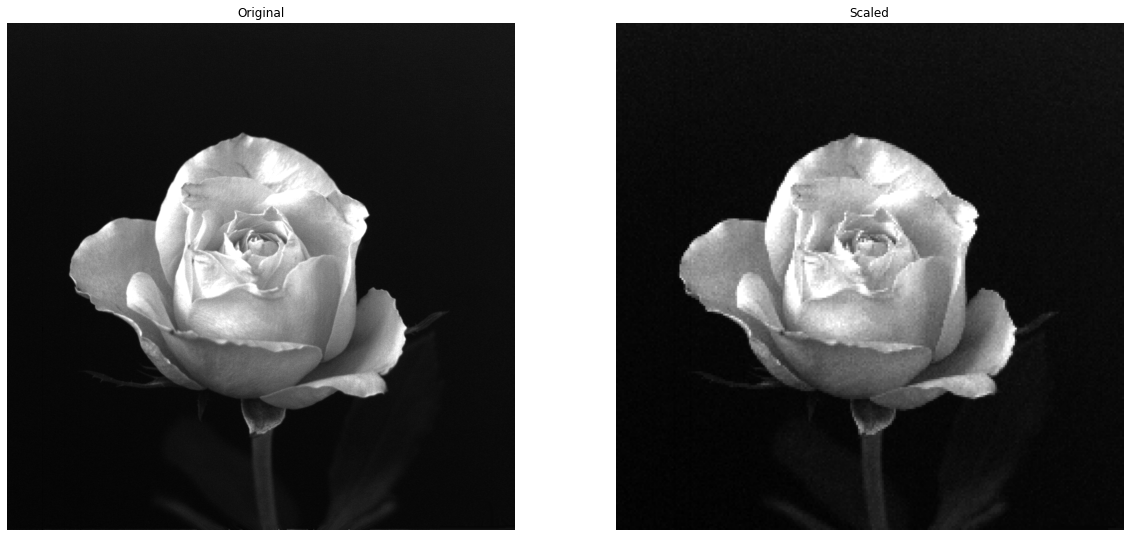

In [9]:
shrink2 = scale_bl(img, 256, 256)

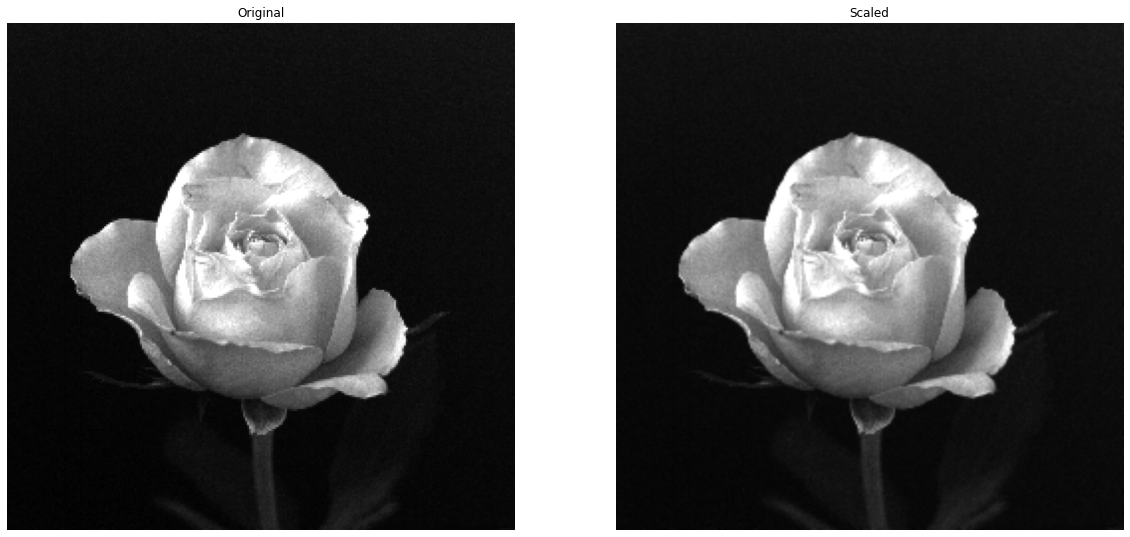

In [10]:
zoom2 = scale_bl(shrink2, 1024, 1024)

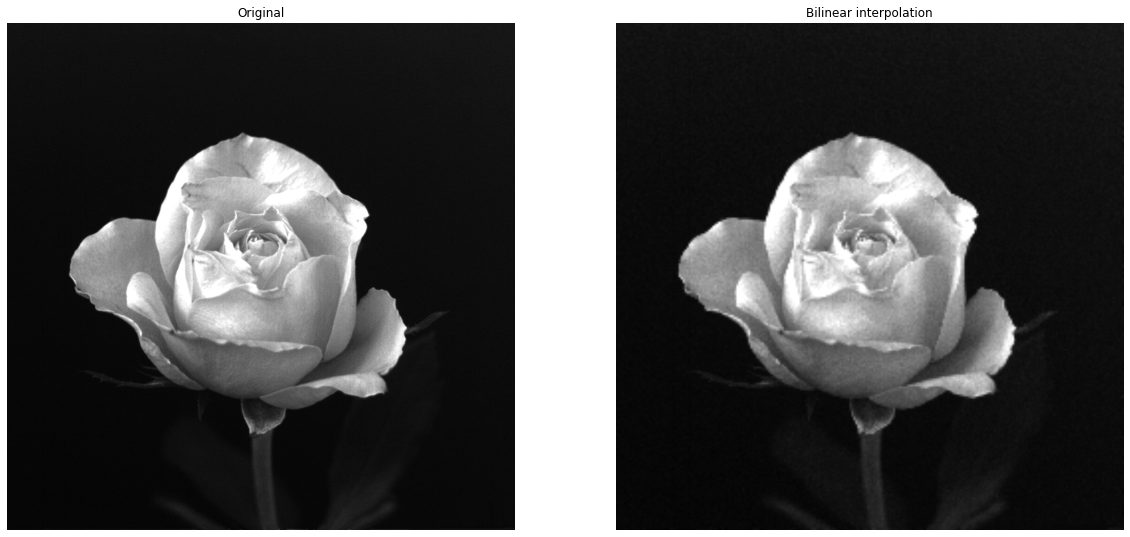

In [11]:
plt.figure(1, figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.title('Bilinear interpolation')
plt.axis('off')
plt.imshow(zoom2, cmap = 'gray')

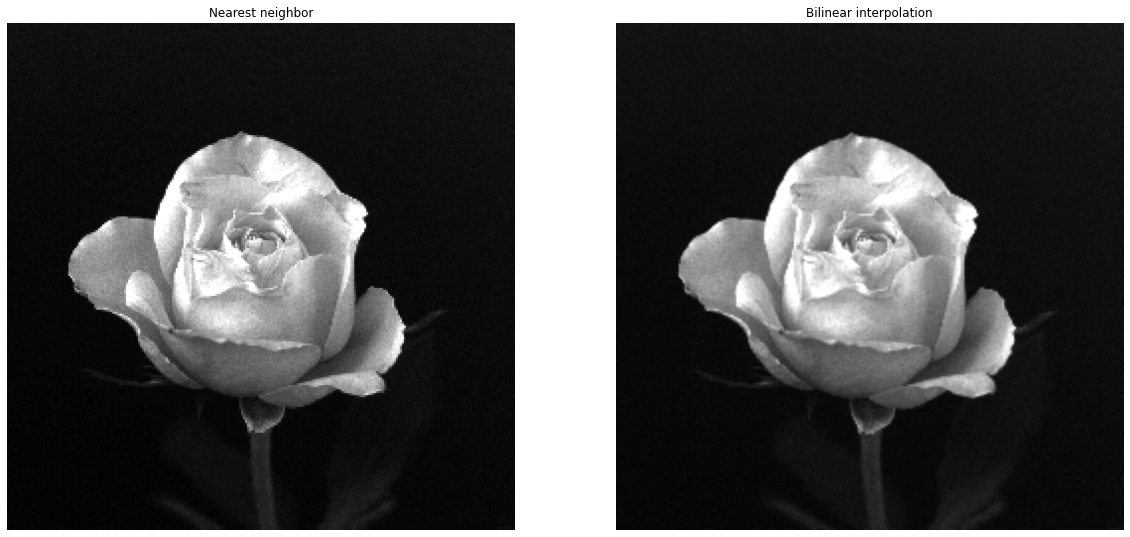

In [12]:
plt.figure(1, figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title('Nearest neighbor')
plt.axis('off')
plt.imshow(zoom1, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.title('Bilinear interpolation')
plt.axis('off')
plt.imshow(zoom2, cmap = 'gray')